# 25-eda-time-gap

> Exploratory data analysis - time gap exploration

This is EDA based around the mega table establishing some attempts to find interesting things from transaction time

In [ ]:
# import libs
import seaborn as sns
import pandas as pd
import janitor
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
mega_table= pd.read_csv('sample_data/mega_table.csv')

In [ ]:
mega_table['date'] = pd.to_datetime(mega_table['date'])

In [ ]:
ind_first = mega_table.groupby('indiv_id').agg({'date':['min','max'], 'sales':'sum'})

In [ ]:
ind_first['days_being_customer'] =(ind_first[('date','max')] - ind_first[('date','min')]).dt.days

In [ ]:
ind_first.columns

MultiIndex([(               'date', 'min'),
            (               'date', 'max'),
            (              'sales', 'sum'),
            ('days_being_customer',    '')],
           )

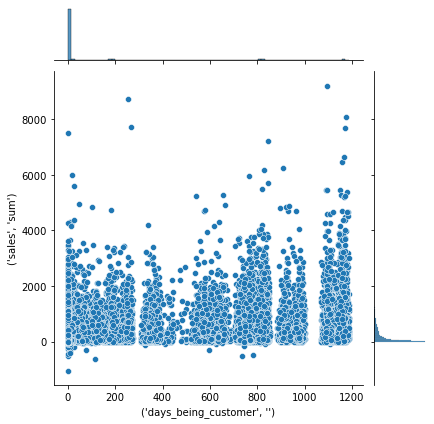

In [ ]:
sns.jointplot(data=ind_first, x= ('days_being_customer',''), y=('sales','sum'))

In [ ]:
transactions = mega_table[mega_table['prod_group_code']==5].groupby('tran_id').agg({'indiv_id':'max', 'vehicle_id':'max', 'sales':'sum', 'date':'max'})

In [ ]:
transactions

,indiv_id,vehicle_id,sales,date
tran_id,,,,
880045770,255126028.0,902624534,96.64,2017-07-06
880114750,288588675.0,11455811,209.18,2015-07-09
880150430,263376855.0,311467330,371.24,2015-11-04
880151780,263376855.0,311470813,726.24,2016-01-08
880151970,262355347.0,311471416,134.69,2016-01-18
...,...,...,...,...
994404830,252820803.0,952339373,149.10,2018-07-10
994407840,514736224.0,961811605,24.75,2018-07-13
994408840,282604897.0,746470826,448.00,2018-07-16


In [ ]:
transactions.loc[880045770,'date']

Timestamp('2017-07-06 00:00:00')

In [ ]:
transactions['date_gap']=0


In [ ]:
transactions['month_gap']=0

In [ ]:
for i in transactions.index:
    latest = transactions[\
                      (transactions['vehicle_id']== transactions.loc[i,'vehicle_id'] ) & \
                      (transactions['date']<transactions.loc[i,'date']) \
                     ].groupby('vehicle_id').agg({'date':'max'})['date']
    if len(latest)!=0:
        transactions.loc[i, 'date_gap'] = \
            (transactions.loc[i, 'date'] - latest).dt.days.values
         
    


In [ ]:
for i in transactions.index:
    latest = transactions[\
                      (transactions['vehicle_id']== transactions.loc[i,'vehicle_id'] ) & \
                      (transactions['date']<transactions.loc[i,'date']) \
                     ].groupby('vehicle_id').agg({'date':'max'})['date']
    if len(latest)!=0:
        transactions.loc[i, 'month_gap'] = \
            ((transactions.loc[i, 'date'] - latest)/np.timedelta64(1, 'M')).values
         
    


In [ ]:
i=880045770
#i=880020240
latest = transactions[\
                      (transactions['vehicle_id']== transactions.loc[i,'vehicle_id'] ) & \
                      (transactions['date']<transactions.loc[i,'date']) \
                     ].groupby('vehicle_id').agg({'date':'max'})['date']

(transactions.loc[i, 'date'] - latest)/np.timedelta64(1, 'M')

Series([], Name: date, dtype: float64)

In [ ]:
transactions['date_gap']

tran_id
880045770    0
880114750    0
880150430    0
880151780    0
880151970    0
            ..
994404830    0
994407840    0
994408840    0
994410810    0
994413160    0
Name: date_gap, Length: 15114, dtype: int64

In [ ]:
transactions.loc[i]

indiv_id              255126028.0
vehicle_id              902624534
sales                       96.64
date          2017-07-06 00:00:00
date_gap                        0
month_gap                     0.0
Name: 880045770, dtype: object

In [ ]:
transactions.to_csv('sample_data/gap.csv')

In [ ]:
transactions[(transactions['date_gap']>0) & (transactions['vehicle_id']!=1)]

,indiv_id,vehicle_id,sales,date,date_gap,month_gap
tran_id,,,,,,
990020630,258875595.0,904685072,-5.48,2017-08-23,18,0.591388
990059050,255878648.0,863303712,63.07,2018-07-26,981,32.230641
990076570,284105855.0,967916295,490.54,2018-07-06,4,0.131420
990091060,287672840.0,932815777,450.00,2016-01-23,180,5.913879
990096550,315728019.0,943843705,77.99,2015-11-20,4,0.131420
...,...,...,...,...,...,...
993548400,454620979.0,956557136,132.80,2018-07-01,327,10.743547
993576030,253826829.0,893229514,315.65,2015-11-02,117,3.844021
993764150,293083048.0,916053162,14.40,2017-07-28,615,20.205754


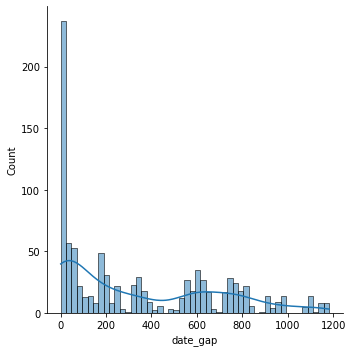

In [ ]:
sns.displot(transactions[(transactions['date_gap']>0) & (transactions['vehicle_id']!=1)]['date_gap'], bins=50, kde=True)

It looks like there are several peaks that we could take further actions.